## Introduction

When talking about which neighborhood is the "best', many factors come into mind, such as safety, education quality, and access to healthcare. After exploring many options, I decided to focus on income as the main metric. Income often reflects multiple aspects of a community since higher-income areas tend to have better access to healthbare, stronger school systems, and more stable familes. My approach was to analyze neighborhood data and compare the median incomes from 1999 and 2009 to determine which neighborhood is "thriving".

## The Metric
The metric that is used to analyze the data is highest median income difference from 1999 to 2009. This metric will meaasure "thriving" neighborhoods in terms of income. The dataset that is used is [Neighborhoods with SNAP Data](https://data.wprdc.org/dataset/neighborhoods-with-snap-data/resource/bce22c26-9d3e-4e3f-8405-a35c4b7765b6).

Below is the code used to measure and analyze the data.

## The Best Neighborhood
From the bar graph we can say that South Shore stands as the single neighborhood with the highest difference in income change, with New Homestead and Fairywood coming in 2nd and 3rd, respectively.

### Best Neighborhood Output

In [27]:
import pandas as pd
import math

data = pd.read_csv("https://data.wprdc.org/datastore/dump/bce22c26-9d3e-4e3f-8405-a35c4b7765b6")

data_array = []

for col in data:
    for i in range(0, len(pd.DataFrame(data)["SNAP_All_csv_2009_Median_Income"])):
        income_2009 = int(data["SNAP_All_csv_2009_Median_Income"][i])
        income_1999 = int(data["SNAP_All_csv_1999_Median_Inco_1"][i])

        data_array.append(data["Neighborhood_2010_HOOD"][i])
        data_array.append(income_2009 - income_1999)


highest_difference = -math.inf
highest_index = -1

for i in range(0, len(data_array), 2):
    if highest_difference < data_array[i + 1]:
        highest_difference = data_array[i + 1]
        highest_index = i

print(data_array[highest_index])
print(data_array[highest_index + 1])

South Shore
134059


## Data Visualization
The code below makes a bar graph that graphs the top 15 highest difference in income.

**fetches the data and sorts it**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

data = pd.read_csv("https://data.wprdc.org/datastore/dump/bce22c26-9d3e-4e3f-8405-a35c4b7765b6")

col_1 = "Neighborhood_2010_HOOD"
col_2 = "SNAP_All_csv_2009_Median_Income"
col_3 = "SNAP_All_csv_1999_Median_Inco_1"

income_df = data[[col_1, col_2, col_3]].copy()
income_df.columns = ["Neighborhood", "Median_Income_2009", "Median_Income_1999"]

income_df["Difference"] = income_df["Median_Income_2009"] - income_df["Median_Income_1999"]
income_df_sorted_descending = income_df.sort_values(by="Difference", ascending=False)
income_df_sorted_ascending = income_df.sort_values(by="Difference", ascending=True)

**helper function that makes a bar graph**

In [19]:
def make_graph(data):
    colors = np.where(data['Difference'] >= 0, "green", "red")
    plt.figure(figsize=(12, 6))
    
    plt.grid(axis="y", linestyle="-", alpha=0.3)
    plt.bar(
        data["Neighborhood"],
        data["Difference"],
        color=colors,
        edgecolor='black'
    )
    
    plt.xlabel("Neighborhoods")
    plt.ylabel("Income Difference")
    
    plt.xticks(
        rotation=45,
        ha="right",
        fontsize=8
    )
    
    plt.title("Difference in Median Income: 1999 vs 2009")
    plt.show()

**setting up the plot data for the bar graphs**

In [16]:
plot_data = income_df_sorted.head(15)
plot_data_2 = income_df_sorted.head(25)

**draws a graph that shows the top 15 income difference**

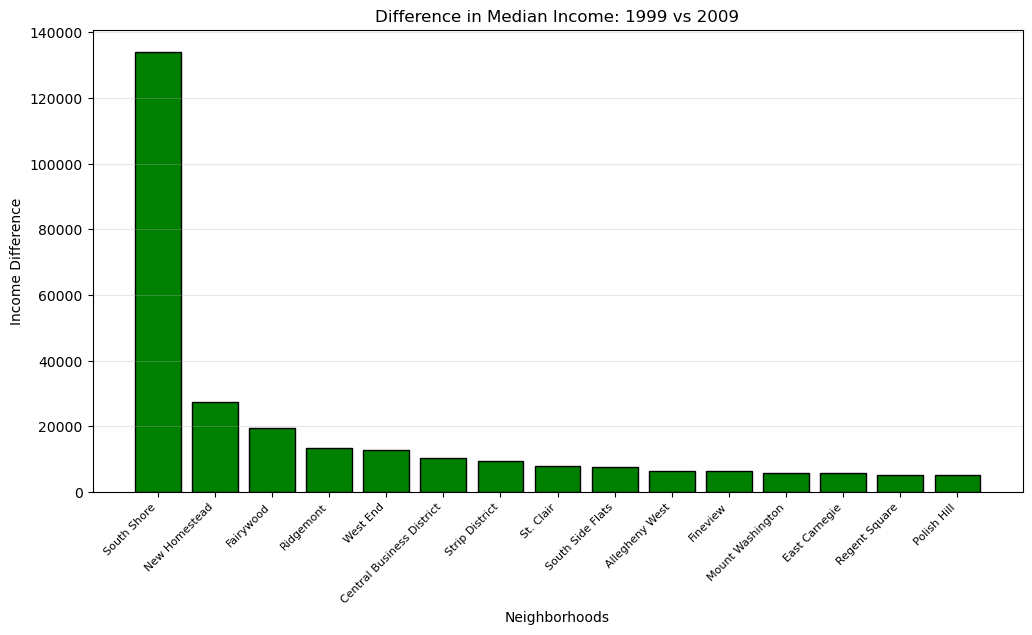

In [18]:
make_graph(plot_data)

**draws a graph that shows the top 25 income difference**

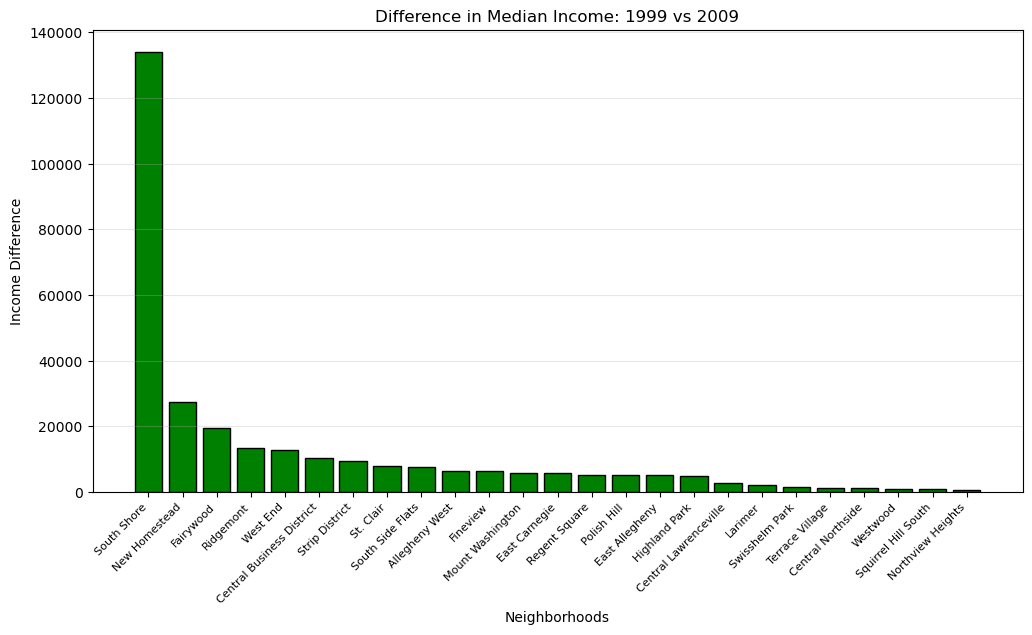

In [17]:
make_graph(plot_data_2)

## Conclusion
lalaal